In [1]:
##Loading the dataset

In [1]:
from datasets import load_dataset

ds = load_dataset("abisee/cnn_dailymail", "3.0.0")
ds.keys()
print(ds['train'])
print(ds['test'])
print(ds['validation'])

c:\Users\Christian\uni\PEFT-T5-on-CNN-dailynews\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 287113
})
Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 11490
})
Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 13368
})


## Inspecting the Dataset

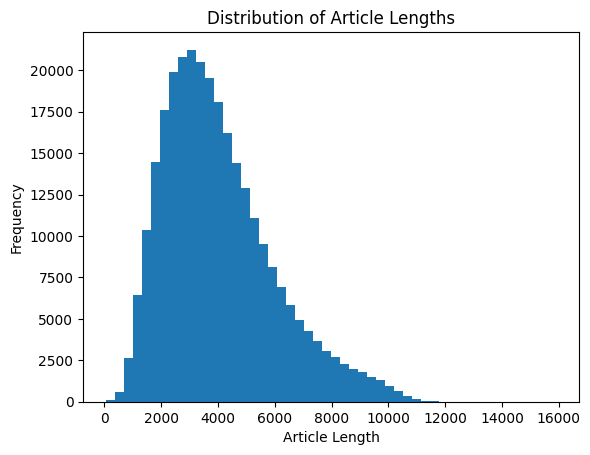

In [2]:
import matplotlib.pyplot as plt

# Visualze the distribution of article lengths
article_lengths = [len(article) for article in ds['train']['article']]

plt.hist(article_lengths, bins=50)
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.title('Distribution of Article Lengths')
plt.show()

In [3]:
ds['train'][0]

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

## Tokenize the Dataset

In [ ]:
# select a subset of the dataset
# Select only the first 500 samples for training
small_train_dataset = ds['train'].select(range(500))
small_validation_dataset = ds['validation'].select(range(500))
small_test_dataset = ds['test'].select(range(500))


In [4]:
from transformers import T5Tokenizer

# Load the T5 tokenizer
tokenizer = T5Tokenizer.from_pretrained('t5-small')

max_input_length = 512
max_target_length = 150

def preprocess_function(examples):
    inputs = ['summarize: ' + doc for doc in examples['article']]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True, padding="max_length")
    
    # Tokenize the summaries (targets)
    labels = tokenizer(examples['highlights'], max_length=max_target_length, truncation=True, padding="max_length")
    
    # Set labels as the target input IDs
    model_inputs["labels"] = labels["input_ids"]
    
    return model_inputs


# tokenize the data 
tokenized_small_train_dataset = small_train_dataset.map(preprocess_function, batched=True)





You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Map:   7%|▋         | 19000/287113 [00:52<12:27, 358.65 examples/s]


KeyboardInterrupt: 